In [193]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

In [83]:
def Normal(x, mean, sigma):
    y = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-((x-mean)**2)/(2*sigma**2))
    return y

In [101]:
def MixNormal(x):
    return 1/4*Normal(x, 0, 1) + 3/4*Normal(x, 6, 1)

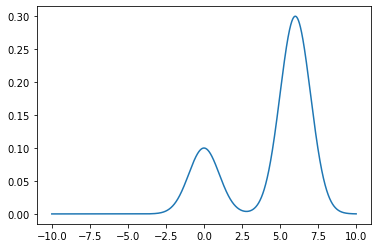

In [107]:
x = np.linspace(-10, 10, 20000)
y = [MixNormal(num) for num in np.linspace(-10, 10, 20000)]
plt.plot(x, y)
plt.show()

In [147]:
mean = 0
sigma = 1

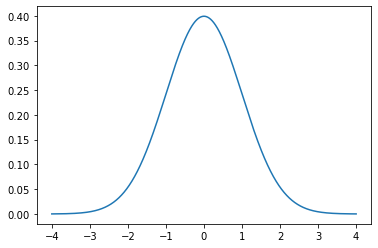

In [148]:
x = np.linspace(-4+mean, 4+mean, 20000)
y = [Normal(num, mean, sigma) for num in np.linspace(-4+mean, 4+mean, 20000)]
plt.plot(x, y)
plt.show()

In [149]:
def MH(INIT, A, ITER):

    x = INIT

    x_flow = []
    for i in range(ITER):

        x_flow.append(x)
        y = x + random.uniform(-A, A)

        u = random.random()
        if u <= min(1, MixNormal(y)/MixNormal(x)):
            x = y

    return x_flow



In [191]:
x_flow = MH(6, 6, 11000)

<function matplotlib.pyplot.show(close=None, block=None)>

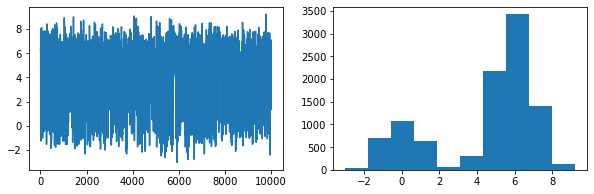

In [192]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(x_flow[1000:])
plt.subplot(1,2,2)
plt.hist(x_flow[1000:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

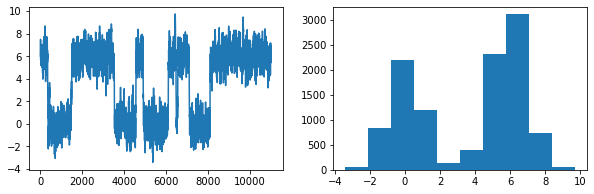

In [182]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(x_flow)
plt.subplot(1,2,2)
plt.hist(x_flow)
plt.show

In [213]:
total_sampling = []
varlist = []
for i in range(100):
    x_flow = MH(random.uniform(-10, 10), 6, 11000)
    x_flow = x_flow[1000:]
    var = statistics.variance(x_flow)
    varlist.append(var)
    for num in x_flow:
        total_sampling.append(num)
r_hat = statistics.variance(total_sampling)/np.mean(varlist)
print(r_hat)

1.0010344936554638


In [215]:
total_sampling = []
varlist = []
for i in range(100):
    x_flow = MH(random.uniform(-10, 10), 0.1, 11000)
    x_flow = x_flow[1000:]
    var = statistics.variance(x_flow)
    varlist.append(var)
    for num in x_flow:
        total_sampling.append(num)
r_hat = statistics.variance(total_sampling)/np.mean(varlist)
print(r_hat)

5.484303979243058
